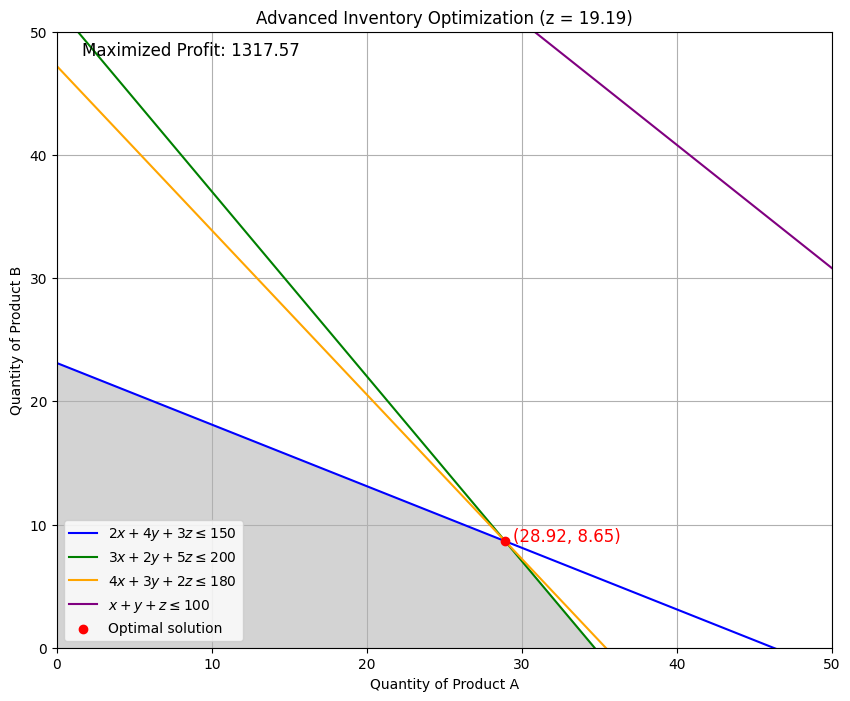

Optimal quantity of Product A: 28.92
Optimal quantity of Product B: 8.65
Optimal quantity of Product C: 19.19
Maximized Profit: 1317.57


In [3]:
import pulp
import numpy as np
import matplotlib.pyplot as plt

# 1. Определение задачи
problem = pulp.LpProblem("Inventory_Optimization_Advanced", pulp.LpMaximize)

# 2. Переменные для трех продуктов
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')  # Продукт A
y = pulp.LpVariable('y', lowBound=0, cat='Continuous')  # Продукт B
z = pulp.LpVariable('z', lowBound=0, cat='Continuous')  # Продукт C

# 3. Целевая функция: максимизация прибыли
problem += 20 * x + 30 * y + 25 * z, "Total Profit"

# 4. Ограничения
problem += 2 * x + 4 * y + 3 * z <= 150, "Resource_1"
problem += 3 * x + 2 * y + 5 * z <= 200, "Resource_2"
problem += 4 * x + 3 * y + 2 * z <= 180, "Resource_3"
problem += x + y + z <= 100, "Storage"

# 5. Решение задачи
problem.solve()

# Получение оптимальных значений
opt_x = x.varValue
opt_y = y.varValue
opt_z = z.varValue
max_profit = pulp.value(problem.objective)

# 6. Визуализация ограничений и решения (для x и y, с z в учете)
x_vals = np.linspace(0, 50, 400)
y1_vals = (150 - 2 * x_vals - 3 * opt_z) / 4  # Ограничение 1 с учетом z
y2_vals = (200 - 3 * x_vals - 5 * opt_z) / 2  # Ограничение 2 с учетом z
y3_vals = (180 - 4 * x_vals - 2 * opt_z) / 3  # Ограничение 3 с учетом z
y_storage = 100 - x_vals - opt_z              # Ограничение хранения

plt.figure(figsize=(10, 8))

# Построение линий ограничений
plt.plot(x_vals, y1_vals, label=r'$2x + 4y + 3z \leq 150$', color='blue')
plt.plot(x_vals, y2_vals, label=r'$3x + 2y + 5z \leq 200$', color='green')
plt.plot(x_vals, y3_vals, label=r'$4x + 3y + 2z \leq 180$', color='orange')
plt.plot(x_vals, y_storage, label=r'$x + y + z \leq 100$', color='purple')

# Закрашиваем допустимую область
plt.fill_between(x_vals, np.minimum(np.minimum(y1_vals, y2_vals), y3_vals), color='lightgrey', where=(y1_vals >= 0) & (y2_vals >= 0) & (y3_vals >= 0) & (y_storage >= 0))

# Построение оптимального решения
plt.scatter(opt_x, opt_y, color='red', zorder=5, label='Optimal solution')
plt.text(opt_x + 0.5, opt_y, f"({opt_x:.2f}, {opt_y:.2f})", color='red', fontsize=12)

# Оформление графика
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.xlabel('Quantity of Product A')
plt.ylabel('Quantity of Product B')
plt.title(f'Advanced Inventory Optimization (z = {opt_z:.2f})')
plt.legend()

# Вывод максимальной прибыли
plt.figtext(0.15, 0.85, f"Maximized Profit: {max_profit:.2f}", fontsize=12, color='black')

# Показ графика
plt.grid(True)
plt.show()

# Вывод значений
print(f"Optimal quantity of Product A: {opt_x:.2f}")
print(f"Optimal quantity of Product B: {opt_y:.2f}")
print(f"Optimal quantity of Product C: {opt_z:.2f}")
print(f"Maximized Profit: {max_profit:.2f}")
